# **Código para creación de imágenes para el dataset empleado para entrenar la red con arquitectura YOLO**

Los códigos aquí presentados permiten generar imágenes con caracteres Braille aleatorios, variando diferentes parámetros como la distancia entre los caracteres, la distancia entre los puntos y la distancia entre renglones. En consecuencia tambíen varía el número de caracteres presentes en la imagen.

## **Crear una sola imagen**


2.8493481049210514
0.09121700470094388
1.1365206967751127


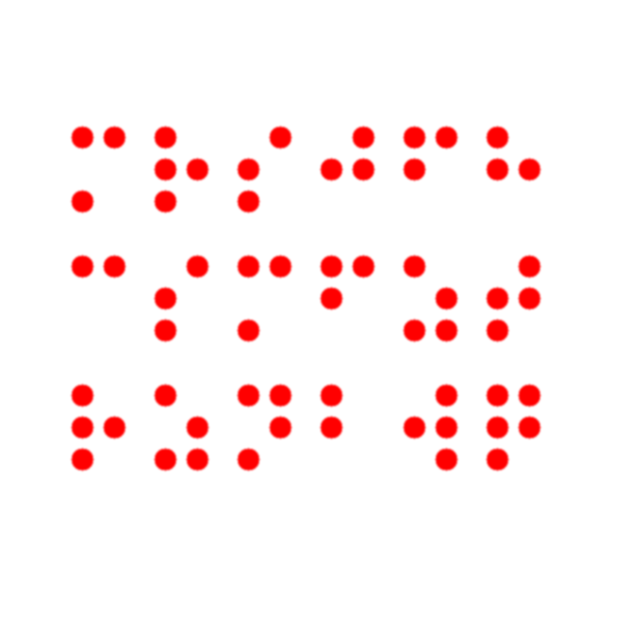

In [2]:
import numpy as np
import cv2
import random
import os
from google.colab.patches import cv2_imshow

# Dimensiones de la imagen
img_size = 640
img = np.ones((img_size, img_size, 3), dtype=np.uint8) * 255  # Imagen blanca

# Parámetros del patrón Braille
dot_radius = 10  # Radio de los puntos

#Puede variar entre 2 y 3
spacing_dot_ratio = random.uniform(2, 3.2)
print(spacing_dot_ratio)
dot_spacing = dot_radius * spacing_dot_ratio  # Espaciado entre puntos dentro de un carácter

#Puede variar entre 0.05 y 0.5
random_factor = random.uniform(0.05, 0.5)
print(random_factor)
char_spacing_x = (2.5 * dot_spacing) + (random_factor*dot_spacing)  # Espaciado entre caracteres

char_spacing_y = (4 * dot_spacing) # Espaciado entre renglones

#Puede variar desde 0.4 hasta 2
scale_factor = random.uniform(0.4, 1.5)  # Factor de escala para el tamaño de los caracteres
print(scale_factor)

# Color de los puntos (en BGR, porque OpenCV usa este formato)
dot_color = (0, 0, 255)  # Rojo

# Alineación de los caracteres
alignment = {
    "horizontal": "center",  # Opciones: 'left', 'center', 'right'
    "vertical": "center",    # Opciones: 'top', 'center', 'bottom'
}

# Generar patrones Braille para las letras A-Z (estándar)
def generate_braille_patterns():
    return [
        [[1, 0], [0, 0], [0, 0]],  # A
        [[1, 0], [1, 0], [0, 0]],  # B
        [[1, 1], [0, 0], [0, 0]],  # C
        [[1, 1], [0, 1], [0, 0]],  # D
        [[1, 0], [0, 1], [0, 0]],  # E
        [[1, 1], [1, 0], [0, 0]],  # F
        [[1, 1], [1, 1], [0, 0]],  # G
        [[1, 0], [1, 1], [0, 0]],  # H
        [[0, 1], [1, 0], [0, 0]],  # I
        [[0, 1], [1, 1], [0, 0]],  # J
        [[1, 0], [0, 0], [1, 0]],  # K
        [[1, 0], [1, 0], [1, 0]],  # L
        [[1, 1], [0, 0], [1, 0]],  # M
        [[1, 1], [0, 1], [1, 0]],  # N
        [[1, 0], [0, 1], [1, 0]],  # O
        [[1, 1], [1, 0], [1, 0]],  # P
        [[1, 1], [1, 1], [1, 0]],  # Q
        [[1, 0], [1, 1], [1, 0]],  # R
        [[0, 1], [1, 0], [1, 0]],  # S
        [[0, 1], [1, 1], [1, 0]],  # T
        [[1, 0], [0, 0], [1, 1]],  # U
        [[1, 0], [1, 0], [1, 1]],  # V
        [[0, 1], [1, 1], [0, 1]],  # W
        [[1, 1], [0, 0], [1, 1]],  # X
        [[1, 1], [0, 1], [1, 1]],  # Y
        [[1, 0], [0, 1], [1, 1]]   # Z
    ]

# Aplicar escala
dot_radius = int(dot_radius * scale_factor)
dot_spacing = int(dot_spacing * scale_factor)
char_spacing_x = int(char_spacing_x * scale_factor)
char_spacing_y = int(char_spacing_y * scale_factor)

# Número de caracteres por renglón y renglones disponibles
chars_per_row = (img_size - char_spacing_x) // char_spacing_x
rows = (img_size - char_spacing_y) // char_spacing_y

# Crear una lista aleatoria de las letras A-Z repetidas para llenar la imagen
braille_patterns = generate_braille_patterns()
num_chars = chars_per_row * rows
letters = [random.randint(0, 25) for _ in range(num_chars)]  # Letras aleatorias del 0 al 25

# Lista para almacenar las etiquetas
labels = []

# Ajustar alineación
def align_position(base, spacing, count, align_type):
    if align_type == "center":
        return (img_size - (count * spacing)) // 2 + base
    elif align_type == "right":
        return img_size - count * spacing + base
    elif align_type == "left":
        return base
    else:
        return base

# Dibujar los caracteres en la imagen
current_idx = 0
for row in range(rows):
    for col in range(chars_per_row):
        if current_idx >= num_chars:
            break

        # Coordenadas ajustadas según alineación
        x_start = align_position(col * char_spacing_x, char_spacing_x, chars_per_row, alignment["horizontal"])
        y_start = align_position(row * char_spacing_y, char_spacing_y, rows, alignment["vertical"])

        # Obtener el patrón Braille para la letra actual
        pattern = braille_patterns[letters[current_idx]]

        # Dimensiones del carácter Braille
        char_width = dot_spacing + dot_radius * 2
        char_height = 2 * dot_spacing + dot_radius * 2

        # Centro del carácter
        x_center = x_start + char_width / 2
        y_center = y_start + char_height / 2

        # Dibujar los puntos del carácter Braille
        for i in range(3):
            for j in range(2):
                if pattern[i][j] == 1:
                    center = (x_start + j * dot_spacing + dot_radius, y_start + i * dot_spacing + dot_radius)
                    cv2.circle(img, center, dot_radius, dot_color, -1)  # Dibuja el círculo relleno

        # Normalizar las coordenadas del bounding box
        x_center_norm = x_center / img_size
        y_center_norm = y_center / img_size
        width_norm = (char_width + (0.1*char_width)) / img_size
        height_norm = (char_height + (0.1*char_height)) / img_size

        # Agregar la etiqueta a la lista
        labels.append(f"{letters[current_idx]} {x_center_norm:.6f} {y_center_norm:.6f} {width_norm:.6f} {height_norm:.6f}")
        current_idx += 1

# Guardar las etiquetas en un archivo .txt
with open("braille_labels.txt", "w") as f:
    f.write("\n".join(labels))

blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

# Guardar la imagen como archivo
cv2.imwrite('braille_text.png', blurred_img)

# Mostrar la imagen
cv2_imshow(blurred_img)

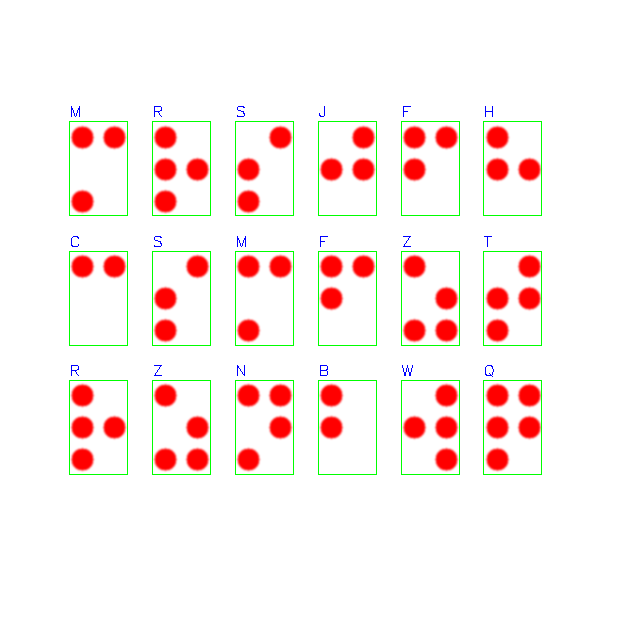

In [4]:
## Esta función permite verificar la correcta creación de los bounding boxes
def visualize_bounding_boxes(image_path, labels_path):
    # Mapeo de IDs de clase a letras
    class_to_label = [chr(i) for i in range(65, 91)]  # Genera ['A', 'B', 'C', ..., 'Z']

    # Leer la imagen
    img = cv2.imread(image_path)
    img_height, img_width = img.shape[:2]  # Dimensiones de la imagen

    # Leer el archivo de etiquetas
    with open(labels_path, 'r') as file:
        lines = file.readlines()

    # Dibujar los bounding boxes en la imagen
    for line in lines:
        # Leer los valores de la etiqueta
        values = line.strip().split()

        # Extraer valores normalizados
        class_id = int(values[0])  # ID de la clase
        x_center_norm = float(values[1])
        y_center_norm = float(values[2])
        width_norm = float(values[3])
        height_norm = float(values[4])

        # Calcular coordenadas absolutas para dibujar el rectángulo
        x_center = int(x_center_norm * img_width)
        y_center = int(y_center_norm * img_height)
        box_width = int(width_norm * img_width)
        box_height = int(height_norm * img_height)

        # Coordenadas del bounding box
        top_left = (x_center - box_width // 2, y_center - box_height // 2)
        bottom_right = (x_center + box_width // 2, y_center + box_height // 2)

        # Dibujar el bounding box
        cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 1)  # Color verde, grosor 1

        # Dibujar el nombre de la etiqueta (letra)
        if 0 <= class_id < len(class_to_label):
            label = class_to_label[class_id]  # Obtener la letra correspondiente
            text_position = (top_left[0], top_left[1] - 5)  # Posición encima del bounding box
            cv2.putText(img, label, text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)  # Azul, grosor 1

    # Mostrar la imagen con los bounding boxes
    cv2_imshow(img)

# Llamar a la función
image_path = 'braille_text.png' # Ruta de la imagen generada
labels_path = 'braille_labels.txt'  # Ruta del archivo de etiquetas
visualize_bounding_boxes(image_path, labels_path)

# **Generar Muchas**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import random
import os
from google.colab.patches import cv2_imshow

# Generar patrones Braille para las letras A-Z (estándar)
def generate_braille_patterns():
    return [
        [[1, 0], [0, 0], [0, 0]],  # A
        [[1, 0], [1, 0], [0, 0]],  # B
        [[1, 1], [0, 0], [0, 0]],  # C
        [[1, 1], [0, 1], [0, 0]],  # D
        [[1, 0], [0, 1], [0, 0]],  # E
        [[1, 1], [1, 0], [0, 0]],  # F
        [[1, 1], [1, 1], [0, 0]],  # G
        [[1, 0], [1, 1], [0, 0]],  # H
        [[0, 1], [1, 0], [0, 0]],  # I
        [[0, 1], [1, 1], [0, 0]],  # J
        [[1, 0], [0, 0], [1, 0]],  # K
        [[1, 0], [1, 0], [1, 0]],  # L
        [[1, 1], [0, 0], [1, 0]],  # M
        [[1, 1], [0, 1], [1, 0]],  # N
        [[1, 0], [0, 1], [1, 0]],  # O
        [[1, 1], [1, 0], [1, 0]],  # P
        [[1, 1], [1, 1], [1, 0]],  # Q
        [[1, 0], [1, 1], [1, 0]],  # R
        [[0, 1], [1, 0], [1, 0]],  # S
        [[0, 1], [1, 1], [1, 0]],  # T
        [[1, 0], [0, 0], [1, 1]],  # U
        [[1, 0], [1, 0], [1, 1]],  # V
        [[0, 1], [1, 1], [0, 1]],  # W
        [[1, 1], [0, 0], [1, 1]],  # X
        [[1, 1], [0, 1], [1, 1]],  # Y
        [[1, 0], [0, 1], [1, 1]]   # Z
    ]

# Ajustar alineación
def align_position(base, spacing, count, align_type):
    if align_type == "center":
        return (img_size - (count * spacing)) // 2 + base
    elif align_type == "right":
        return img_size - count * spacing + base
    elif align_type == "left":
        return base
    else:
        return base

# Dimensiones de la imagen
img_size = 640

# Alineación de los caracteres
alignment = {
    "horizontal": "center",  # Opciones: 'left', 'center', 'right'
    "vertical": "center",    # Opciones: 'top', 'center', 'bottom'
}

# Color de los puntos (en BGR, porque OpenCV usa este formato)
dot_color = (0, 0, 255)  # Rojo

total_imagenes = 5000

for index in range(total_imagenes):  # Ahora hacemos 5 iteraciones
    # Reinicializar la imagen y variables
    img = np.ones((img_size, img_size, 3), dtype=np.uint8) * 255  # Imagen blanca
    labels = []  # Reiniciar la lista de etiquetas
    current_idx = 0  # Reiniciar el índice actual

    # Parámetros del patrón Braille
    dot_radius = 10  # Radio de los puntos

    #Puede variar entre 2 y 3
    spacing_dot_ratio = random.uniform(2.2, 3.2)
    dot_spacing = dot_radius * spacing_dot_ratio  # Espaciado entre puntos dentro de un carácter

    #Puede variar entre 0.05 y 0.5
    random_factor = random.uniform(0.05, 0.5)
    char_spacing_x = (2.5 * dot_spacing) + (random_factor*dot_spacing)  # Espaciado entre caracteres
    char_spacing_y = (4 * dot_spacing) # Espaciado entre renglones

    #Puede variar desde 0.4 hasta 2
    scale_factor = random.uniform(0.4, 1.5)  # Factor de escala para el tamaño de los caracteres

    # Aplicar escala
    dot_radius = int(dot_radius * scale_factor)
    dot_spacing = int(dot_spacing * scale_factor)
    char_spacing_x = int(char_spacing_x * scale_factor)
    char_spacing_y = int(char_spacing_y * scale_factor)

    # Número de caracteres por renglón y renglones disponibles
    chars_per_row = (img_size - char_spacing_x) // char_spacing_x
    rows = (img_size - char_spacing_y) // char_spacing_y

    # Crear una lista aleatoria de las letras A-Z repetidas para llenar la imagen
    braille_patterns = generate_braille_patterns()
    num_chars = chars_per_row * rows
    letters = [random.randint(0, 25) for _ in range(num_chars)]  # Letras aleatorias del 0 al 25

    # Dibujar los caracteres en la imagen
    for row in range(rows):
        for col in range(chars_per_row):
            if current_idx >= num_chars:
                break

            # Coordenadas ajustadas según alineación
            x_start = align_position(col * char_spacing_x, char_spacing_x, chars_per_row, alignment["horizontal"])
            y_start = align_position(row * char_spacing_y, char_spacing_y, rows, alignment["vertical"])

            # Obtener el patrón Braille para la letra actual
            pattern = braille_patterns[letters[current_idx]]

            # Dimensiones del carácter Braille
            char_width = dot_spacing + dot_radius * 2
            char_height = 2 * dot_spacing + dot_radius * 2

            # Centro del carácter
            x_center = x_start + char_width / 2
            y_center = y_start + char_height / 2

            # Dibujar los puntos del carácter Braille
            for i in range(3):
                for j in range(2):
                    if pattern[i][j] == 1:
                        center = (x_start + j * dot_spacing + dot_radius, y_start + i * dot_spacing + dot_radius)
                        cv2.circle(img, center, dot_radius, dot_color, -1)  # Dibuja el círculo relleno

            # Normalizar las coordenadas del bounding box
            x_center_norm = x_center / img_size
            y_center_norm = y_center / img_size
            width_norm = (char_width + (0.1*char_width)) / img_size
            height_norm = (char_height + (0.1*char_height)) / img_size

            # Agregar la etiqueta a la lista
            labels.append(f"{letters[current_idx]} {x_center_norm:.6f} {y_center_norm:.6f} {width_norm:.6f} {height_norm:.6f}")
            current_idx += 1

    if index>= (total_imagenes/2):
      img = cv2.GaussianBlur(img, (5, 5), 0)

    # Guardar etiquetas e imagen
    os.makedirs("/content/DATASET_BRAILE_VC/labels_train", exist_ok=True)
    with open(f"/content/DATASET_BRAILE_VC/labels_train/tr{index+1}.txt", "w") as f:
        f.write("\n".join(labels))

    os.makedirs("/content/DATASET_BRAILE_VC/images_train", exist_ok=True)
    cv2.imwrite(f"/content/DATASET_BRAILE_VC/images_train/tr{index+1}.png", img)

    cv2.destroyAllWindows()
    del img
    del labels

    print(index)

# **Imagen con palabra conocida**

0.94


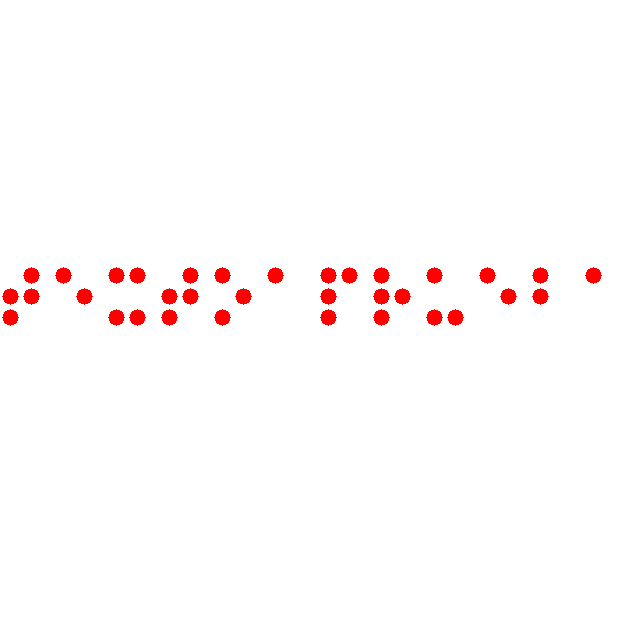

In [5]:
import numpy as np
import cv2
import random
import os
from google.colab.patches import cv2_imshow

# Dimensiones de la imagen
img_size = 640
img = np.ones((img_size, img_size, 3), dtype=np.uint8) * 255  # Imagen blanca

# Parámetros del patrón Braille
dot_radius = 9  # Radio de los puntos

#Puede variar entre 2 y 3
spacing_dot_ratio = 2.5
dot_spacing = dot_radius * spacing_dot_ratio  # Espaciado entre puntos dentro de un carácter

#Puede variar entre 0.05 y 0.5
random_factor = 0.05
char_spacing_x = (2.5 * dot_spacing) + (random_factor*dot_spacing)  # Espaciado entre caracteres
char_spacing_y = (5 * dot_spacing) # Espaciado entre renglones

#Puede variar desde 0.4 hasta 2
scale_factor = 0.94  # Factor de escala para el tamaño de los caracteres
print(scale_factor)

# Color de los puntos (en BGR, porque OpenCV usa este formato)
dot_color = (0, 0, 255)  # Rojo

# Alineación de los caracteres
alignment = {
    "horizontal": "center",  # Opciones: 'left', 'center', 'right'
    "vertical": "center",    # Opciones: 'top', 'center', 'bottom'
}

# Generar patrones Braille para las letras A-Z (estándar)
def generate_braille_patterns():
    return [
        [[1, 0], [0, 0], [0, 0]],  # A
        [[1, 0], [1, 0], [0, 0]],  # B
        [[1, 1], [0, 0], [0, 0]],  # C
        [[1, 1], [0, 1], [0, 0]],  # D
        [[1, 0], [0, 1], [0, 0]],  # E
        [[1, 1], [1, 0], [0, 0]],  # F
        [[1, 1], [1, 1], [0, 0]],  # G
        [[1, 0], [1, 1], [0, 0]],  # H
        [[0, 1], [1, 0], [0, 0]],  # I
        [[0, 1], [1, 1], [0, 0]],  # J
        [[1, 0], [0, 0], [1, 0]],  # K
        [[1, 0], [1, 0], [1, 0]],  # L
        [[1, 1], [0, 0], [1, 0]],  # M
        [[1, 1], [0, 1], [1, 0]],  # N
        [[1, 0], [0, 1], [1, 0]],  # O
        [[1, 1], [1, 0], [1, 0]],  # P
        [[1, 1], [1, 1], [1, 0]],  # Q
        [[1, 0], [1, 1], [1, 0]],  # R
        [[0, 1], [1, 0], [1, 0]],  # S
        [[0, 1], [1, 1], [1, 0]],  # T
        [[1, 0], [0, 0], [1, 1]],  # U
        [[1, 0], [1, 0], [1, 1]],  # V
        [[0, 1], [1, 1], [0, 1]],  # W
        [[1, 1], [0, 0], [1, 1]],  # X
        [[1, 1], [0, 1], [1, 1]],  # Y
        [[1, 0], [0, 1], [1, 1]]  # Z
    ]

# Aplicar escala
dot_radius = int(dot_radius * scale_factor)
dot_spacing = int(dot_spacing * scale_factor)
char_spacing_x = int(char_spacing_x * scale_factor)
char_spacing_y = int(char_spacing_y * scale_factor)

letters = [ 19, 4, 23, 19, 14, 0, 15, 17, 20, 4, 1, 0]

# Número de caracteres por renglón y renglones disponibles
chars_per_row = len(letters)

rows = 1

# Crear una lista aleatoria de las letras A-Z repetidas para llenar la imagen
braille_patterns = generate_braille_patterns()
num_chars = chars_per_row * rows


# Lista para almacenar las etiquetas
labels = []

# Ajustar alineación
def align_position(base, spacing, count, align_type):
    if align_type == "center":
        return (img_size - (count * spacing)) // 2 + base
    elif align_type == "right":
        return img_size - count * spacing + base
    elif align_type == "left":
        return base
    else:
        return base

# Dibujar los caracteres en la imagen
current_idx = 0
for row in range(rows):
    for col in range(chars_per_row):
        if current_idx >= num_chars:
            break

        # Coordenadas ajustadas según alineación
        x_start = align_position(col * char_spacing_x, char_spacing_x, chars_per_row, alignment["horizontal"])
        y_start = align_position(row * char_spacing_y, char_spacing_y, rows, alignment["vertical"])

        # Obtener el patrón Braille para la letra actual
        pattern = braille_patterns[letters[current_idx]]

        # Dimensiones del carácter Braille
        char_width = dot_spacing + dot_radius * 2
        char_height = 2 * dot_spacing + dot_radius * 2

        # Centro del carácter
        x_center = x_start + char_width / 2
        y_center = y_start + char_height / 2

        # Dibujar los puntos del carácter Braille
        for i in range(3):
            for j in range(2):
                if pattern[i][j] == 1:
                    center = (x_start + j * dot_spacing + dot_radius, y_start + i * dot_spacing + dot_radius)
                    cv2.circle(img, center, dot_radius, dot_color, -1)  # Dibuja el círculo relleno

        # Normalizar las coordenadas del bounding box
        x_center_norm = x_center / img_size
        y_center_norm = y_center / img_size
        width_norm = (char_width + (0.1*char_width)) / img_size
        height_norm = (char_height + (0.1*char_height)) / img_size

        # Agregar la etiqueta a la lista
        labels.append(f"{letters[current_idx]} {x_center_norm:.6f} {y_center_norm:.6f} {width_norm:.6f} {height_norm:.6f}")
        current_idx += 1

# Guardar las etiquetas en un archivo .txt
with open("braille_labels.txt", "w") as f:
    f.write("\n".join(labels))


# Guardar la imagen como archivo
cv2.imwrite('braille_text.png', img)

# Mostrar la imagen
cv2_imshow(img)